In [2]:
import lightning as L 
import matplotlib.pyplot as plt
import lightning as L
from lightning.pytorch.tuner import Tuner
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor, EarlyStopping, StochasticWeightAveraging
import torch 
import numpy as np
import pandas as pd
torch.set_default_dtype(torch.float64)
torch.set_float32_matmul_precision("high")

C:\Users\Atomt\AppData\Local\Temp\ipykernel_23312\1085213134.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'legend.fontsize': 18,
   'xtick.labelsize': 18,
   'ytick.labelsize': 18,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

In [42]:
from src.models.AE import AutoEncoder_01
df_ls = pd.read_csv("scan_nPrune_02_LatentScaling.csv")
df_layerS = pd.read_csv("scan_nPrune_02_LayerScaling.csv")
df_ls

,VersionID,best_epoch,val_loss,batch_size,latent_dim,n_layers
0,0,46,2.880567e-03,1024,2,1
1,1,70,2.440319e-04,1024,4,1
2,10,198,1.114918e-09,1024,22,1
3,11,198,6.042637e-10,1024,24,1
4,12,197,1.509878e-09,1024,26,1
5,13,195,5.543224e-10,1024,28,1
6,14,199,5.587111e-04,1024,2,2
7,15,199,3.917887e-05,1024,4,2
8,16,199,1.455025e-06,1024,6,2
9,17,199,1.012377e-07,1024,8,2


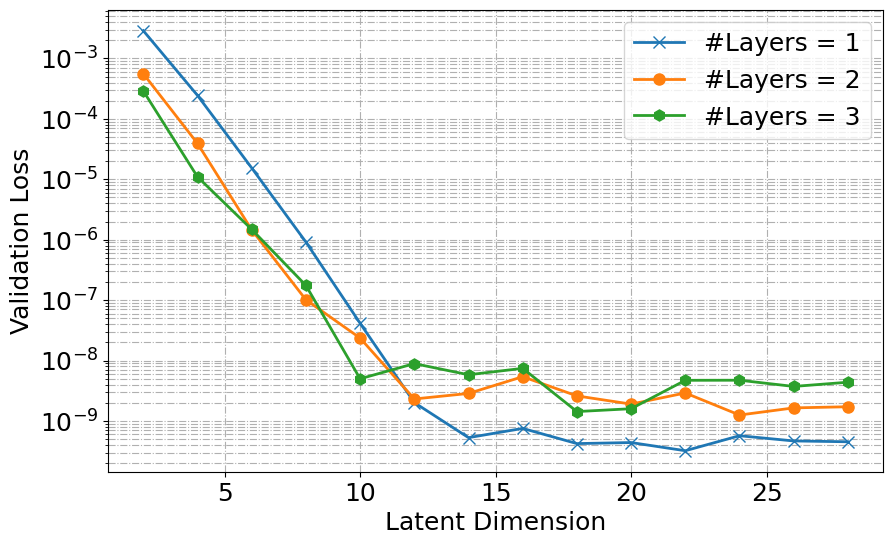

In [82]:
bs = 1024
t1 = df_ls[(df_ls.n_layers == 1) & (df_ls.batch_size == 256)].sort_values(by=['latent_dim'])
t2 = df_ls[(df_ls.n_layers == 2) & (df_ls.batch_size == bs)].sort_values(by=['latent_dim'])
t3 = df_ls[(df_ls.n_layers == 3) & (df_ls.batch_size == bs)].sort_values(by=['latent_dim'])

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)
ax.plot(t1.latent_dim, t1.val_loss, marker='x', label="#Layers = 1", linewidth=2, markersize=8)
ax.plot(t2.latent_dim, t2.val_loss, marker='o', label="#Layers = 2", linewidth=2, markersize=8)
ax.plot(t3.latent_dim, t3.val_loss, marker='h', label="#Layers = 3", linewidth=2, markersize=8)

ax.set_yscale('log')
ax.grid(axis="both", which="both", linestyle="-.")
ax.legend()
ax.set_xlabel("Latent Dimension")
ax.set_ylabel("Validation Loss")

plt.savefig("AE_GF_loss_of_latentDim.pdf")

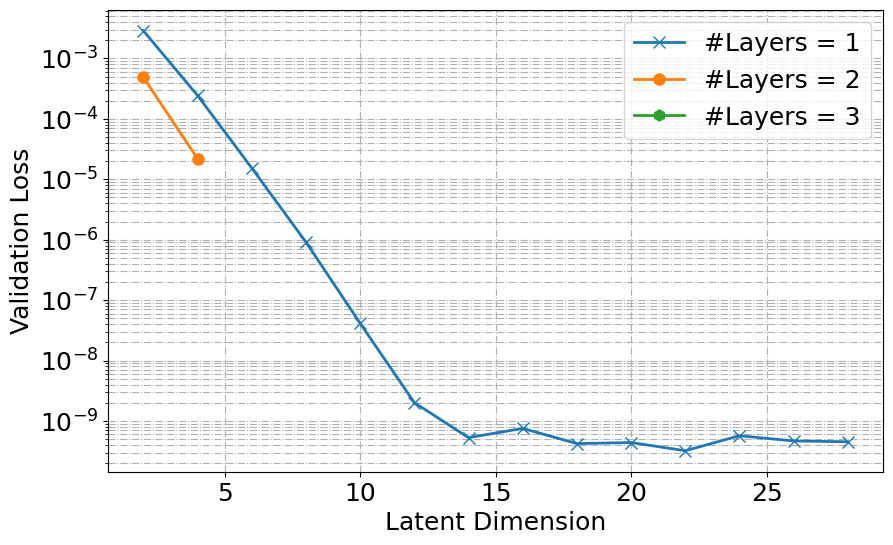

In [83]:
bs = 256
t1 = df_ls[(df_ls.n_layers == 1) & (df_ls.batch_size == bs)].sort_values(by=['latent_dim'])
t2 = df_ls[(df_ls.n_layers == 2) & (df_ls.batch_size == bs)].sort_values(by=['latent_dim'])
t3 = df_ls[(df_ls.n_layers == 3) & (df_ls.batch_size == bs)].sort_values(by=['latent_dim'])

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)
ax.plot(t1.latent_dim, t1.val_loss, marker='x', label="#Layers = 1", linewidth=2, markersize=8)
ax.plot(t2.latent_dim, t2.val_loss, marker='o', label="#Layers = 2", linewidth=2, markersize=8)
ax.plot(t3.latent_dim, t3.val_loss, marker='h', label="#Layers = 3", linewidth=2, markersize=8)

ax.set_yscale('log')
ax.grid(axis="both", which="both", linestyle="-.")
ax.legend()
ax.set_xlabel("Latent Dimension")
ax.set_ylabel("Validation Loss")

plt.savefig("AE_GF_loss_of_latentDim2.pdf")

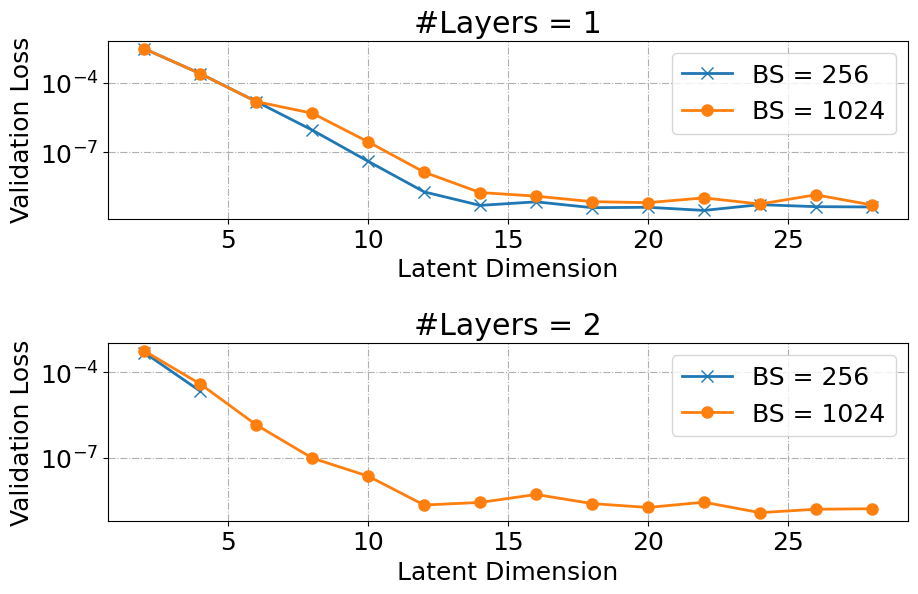

In [45]:
t1 = df_ls[(df_ls.n_layers == 1) & (df_ls.batch_size == 256)].sort_values(by=['latent_dim'])
t2 = df_ls[(df_ls.n_layers == 1) & (df_ls.batch_size == 1024)].sort_values(by=['latent_dim'])

fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.7)

ax = fig.add_subplot(211)
ax.set_title("#Layers = 1")
ax.plot(t1.latent_dim, t1.val_loss, marker='x', label="BS = 256", linewidth=2, markersize=8)
ax.plot(t2.latent_dim, t2.val_loss, marker='o', label="BS = 1024", linewidth=2, markersize=8)
ax.set_yscale('log')
ax.grid(axis="both", which="both", linestyle="-.")

ax.legend()
ax.set_xlabel("Latent Dimension")
ax.set_ylabel("Validation Loss")


t1 = df_ls[(df_ls.n_layers == 2) & (df_ls.batch_size == 256)].sort_values(by=['latent_dim'])
t2 = df_ls[(df_ls.n_layers == 2) & (df_ls.batch_size == 1024)].sort_values(by=['latent_dim'])
ax = fig.add_subplot(212)
ax.set_title("#Layers = 2")
ax.plot(t1.latent_dim, t1.val_loss, marker='x', label="BS = 256", linewidth=2, markersize=8)
ax.plot(t2.latent_dim, t2.val_loss, marker='o', label="BS = 1024", linewidth=2, markersize=8)
ax.set_yscale('log')
ax.grid(axis="both", which="both", linestyle="-.")

ax.legend()
ax.set_xlabel("Latent Dimension")
ax.set_ylabel("Validation Loss")

plt.savefig("AE_GF_loss_of_latentDim_batchSize.pdf")

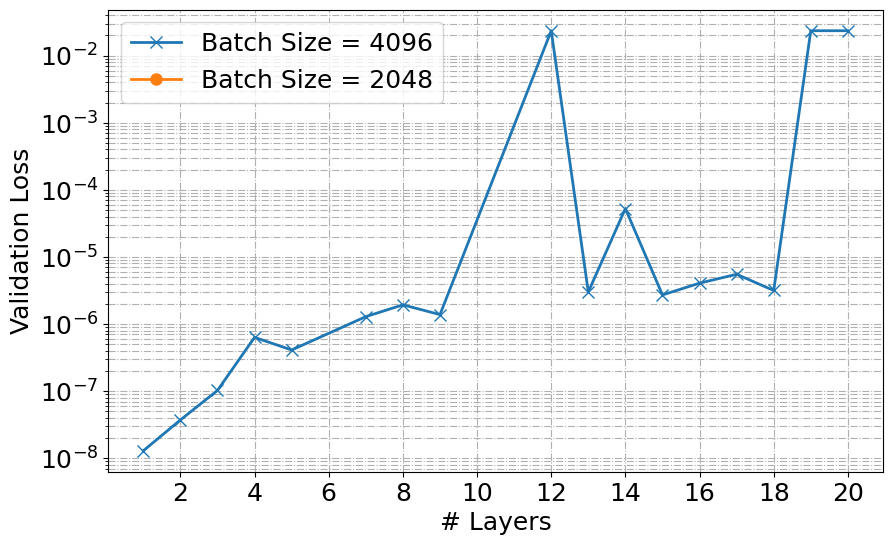

In [10]:
t1 = df_layerS[df_layerS.batch_size == 4096].sort_values(by=['n_layers'])
t2 = df_layerS[df_layerS.batch_size == 2048].sort_values(by=['n_layers'])

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)
ax.plot(t1.n_layers, t1.val_loss, marker='x', label="Batch Size = 4096", linewidth=2, markersize=8)
ax.plot(t2.n_layers, t2.val_loss, marker='o', label="Batch Size = 2048", linewidth=2, markersize=8)

ax.set_yscale('log')
ax.grid(axis="both", which="both", linestyle="-.")
ax.legend()
ax.set_xlabel("# Layers")
ax.set_ylabel("Validation Loss")
ax.set_xticks(ticks=[2,4,6,8,10,12,14,16,18,20])

plt.savefig("AE_GF_loss_of_n_layers.pdf")

In [11]:
df_layerS[df_ls.batch_size == 4096].sort_values(by=['n_layers'])

C:\Users\Atomt\AppData\Local\Temp\ipykernel_8080\4240529726.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_layerS[df_ls.batch_size == 4096].sort_values(by=['n_layers'])


,VersionID,best_epoch,val_loss,batch_size,n_layers


In [60]:
pl_i = 19
model = AutoEncoder_01.load_from_checkpoint("lightning_logs/AE_nPrune_02_nLayers_LatentScaling/version_{}/checkpoints/last.ckpt".format(pl_i))
device = "cpu"
model.setup()
model.to(device)
model.eval()

AutoEncoder_01(
  (dropout_in): Identity()
  (dropout): Identity()
  (loss): MSELoss()
  (activation): ReLU()
  (encoder): Sequential(
    (0): Identity()
    (1): Linear(in_features=200, out_features=106, bias=True)
    (2): Identity()
    (3): ReLU()
    (4): Identity()
    (5): Linear(in_features=106, out_features=12, bias=True)
    (6): Identity()
    (7): Identity()
  )
  (decoder): Sequential(
    (0): Identity()
    (1): Linear(in_features=12, out_features=106, bias=True)
    (2): Identity()
    (3): ReLU()
    (4): Identity()
    (5): Linear(in_features=106, out_features=200, bias=True)
    (6): Identity()
    (7): Identity()
  )
)

In [61]:
ind = 1234
x_test, y_test = model.val_dataset[ind]
x_test = x_test.to(device).reshape(1,-1)

In [70]:
model.state_dict();

OrderedDict([('encoder.1.weight',
              tensor([[-0.0283,  0.0925,  0.0834,  ...,  0.0143,  0.0538, -0.0315],
                      [ 0.0359, -0.0185,  0.1144,  ...,  0.0730,  0.0714,  0.0538],
                      [ 0.0129,  0.0044, -0.0622,  ..., -0.1453, -0.1224, -0.0730],
                      ...,
                      [ 0.0174, -0.0388, -0.1240,  ...,  0.1795,  0.2172,  0.0628],
                      [-0.0187, -0.1036,  0.1050,  ..., -0.1886, -0.0123,  0.0173],
                      [-0.0182,  0.2789, -0.4384,  ...,  0.0090,  0.0421,  0.0307]])),
             ('encoder.1.bias',
              tensor([-0.0389,  0.0000, -0.0144, -0.0659, -0.0145, -0.0165, -0.0025, -0.0209,
                      -0.0234, -0.0225, -0.0189, -0.0079,  0.0000,  0.0000, -0.0291,  0.1119,
                      -0.0258, -0.0227, -0.0210, -0.0235, -0.0241, -0.0098, -0.0219, -0.0267,
                      -0.0158,  0.0138, -0.0213,  0.0000, -0.0234, -0.0048,  0.0005,  0.1271,
                       0

In [72]:
encder_weights_1 = model.state_dict()['encoder.1.weight'].detach().numpy()
encder_bias_1    = model.state_dict()['encoder.1.bias'].detach().numpy()

In [76]:
encder_weights_2 = model.state_dict()['encoder.5.weight'].detach().numpy()
encder_bias_2    = model.state_dict()['encoder.5.bias'].detach().numpy()

In [68]:
x_encode

array([ 0.18972872, -0.1997246 , -0.03869848, -0.17280008, -0.15805782,
        0.20222548, -0.16614101,  0.0284381 ,  0.04256693,  0.09622331,
       -0.3542542 ,  0.12037913])

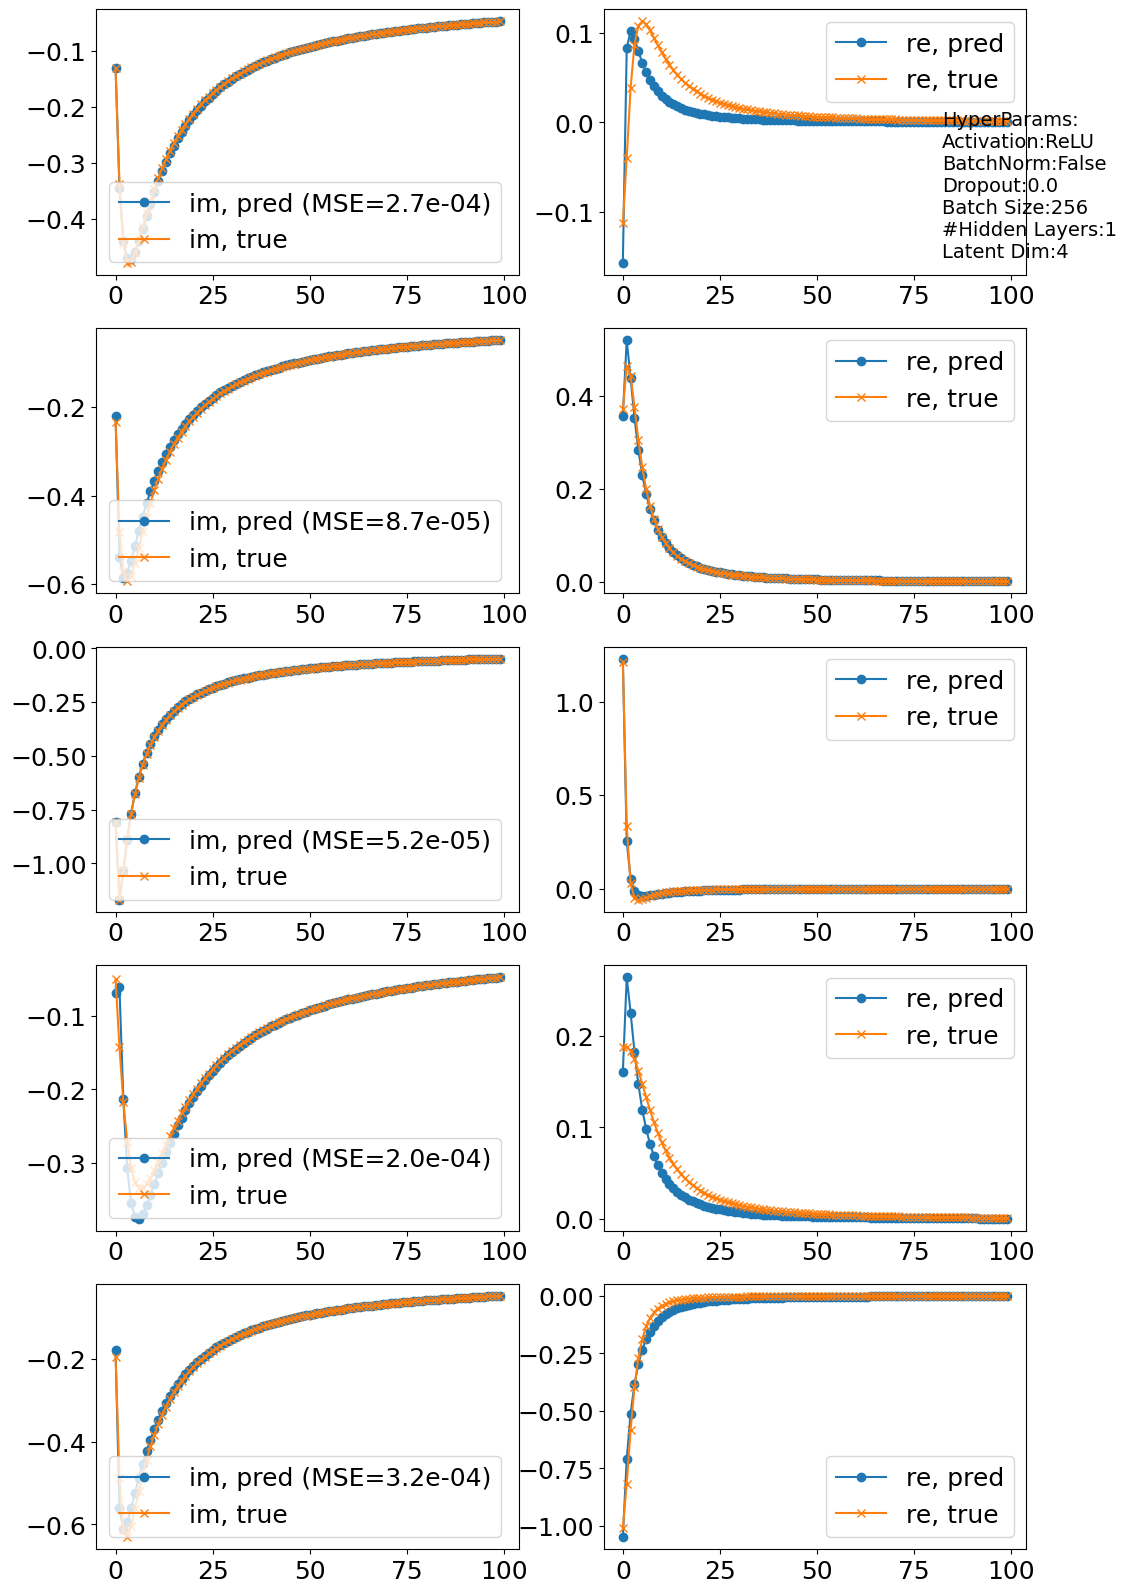

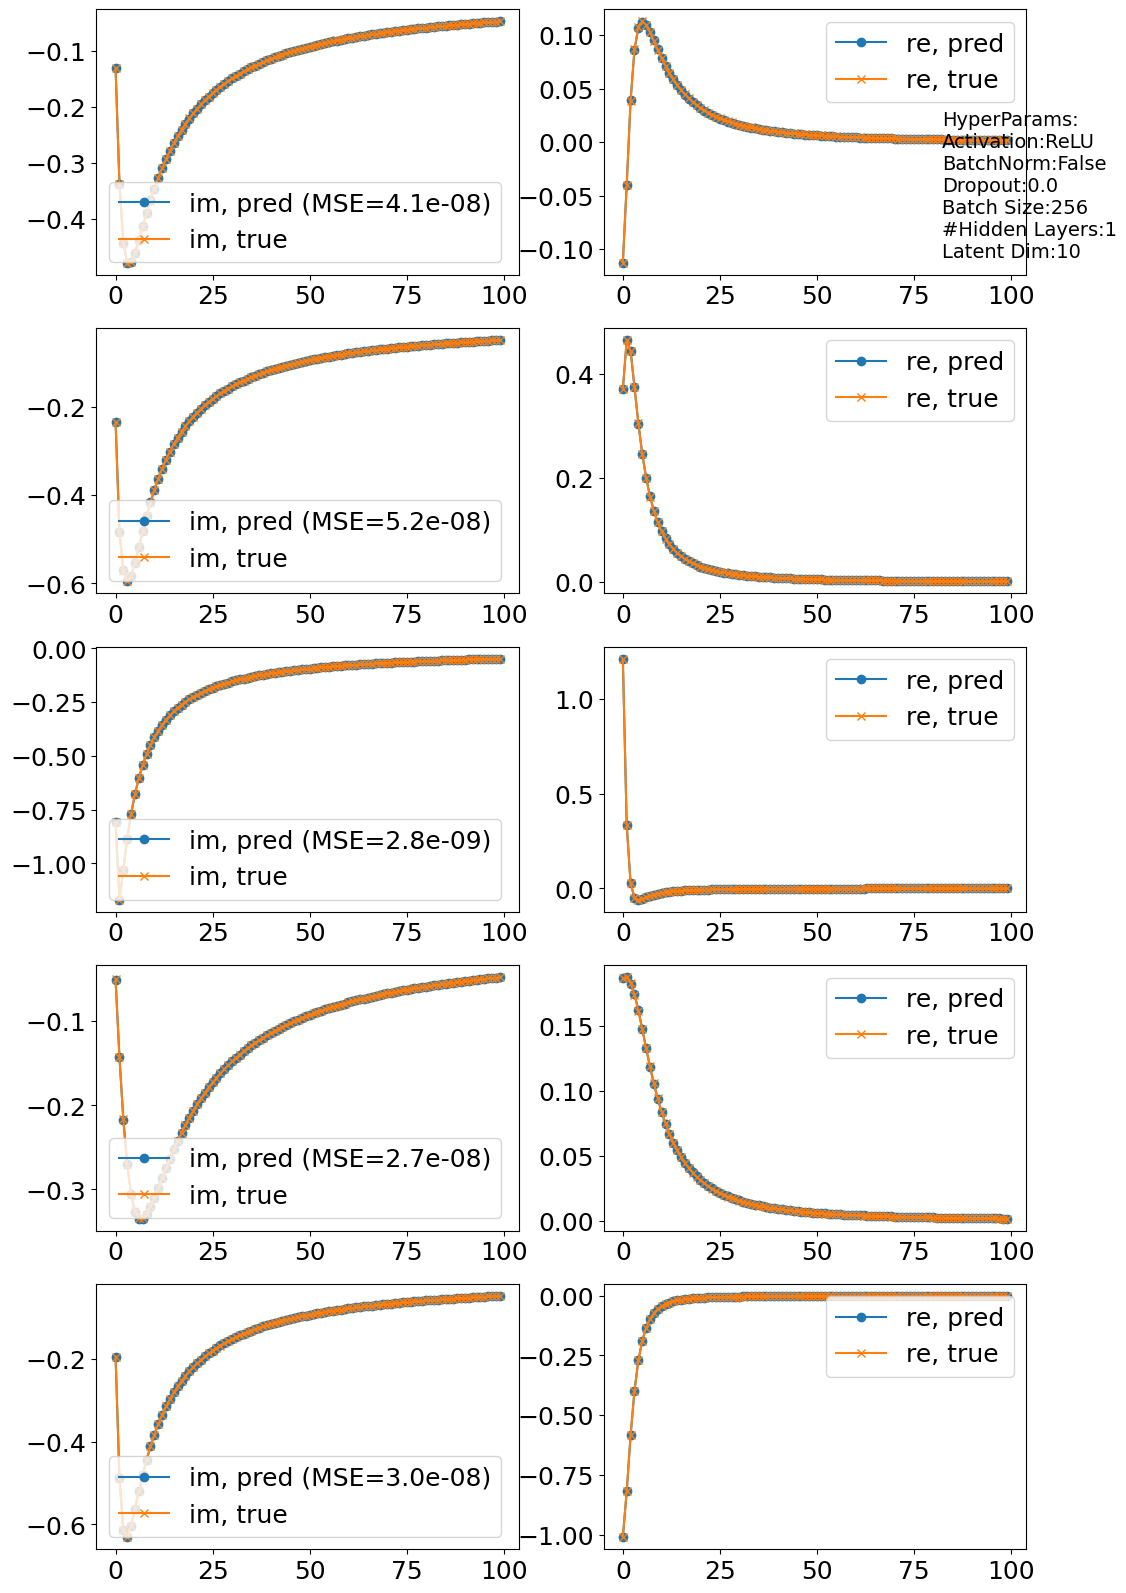

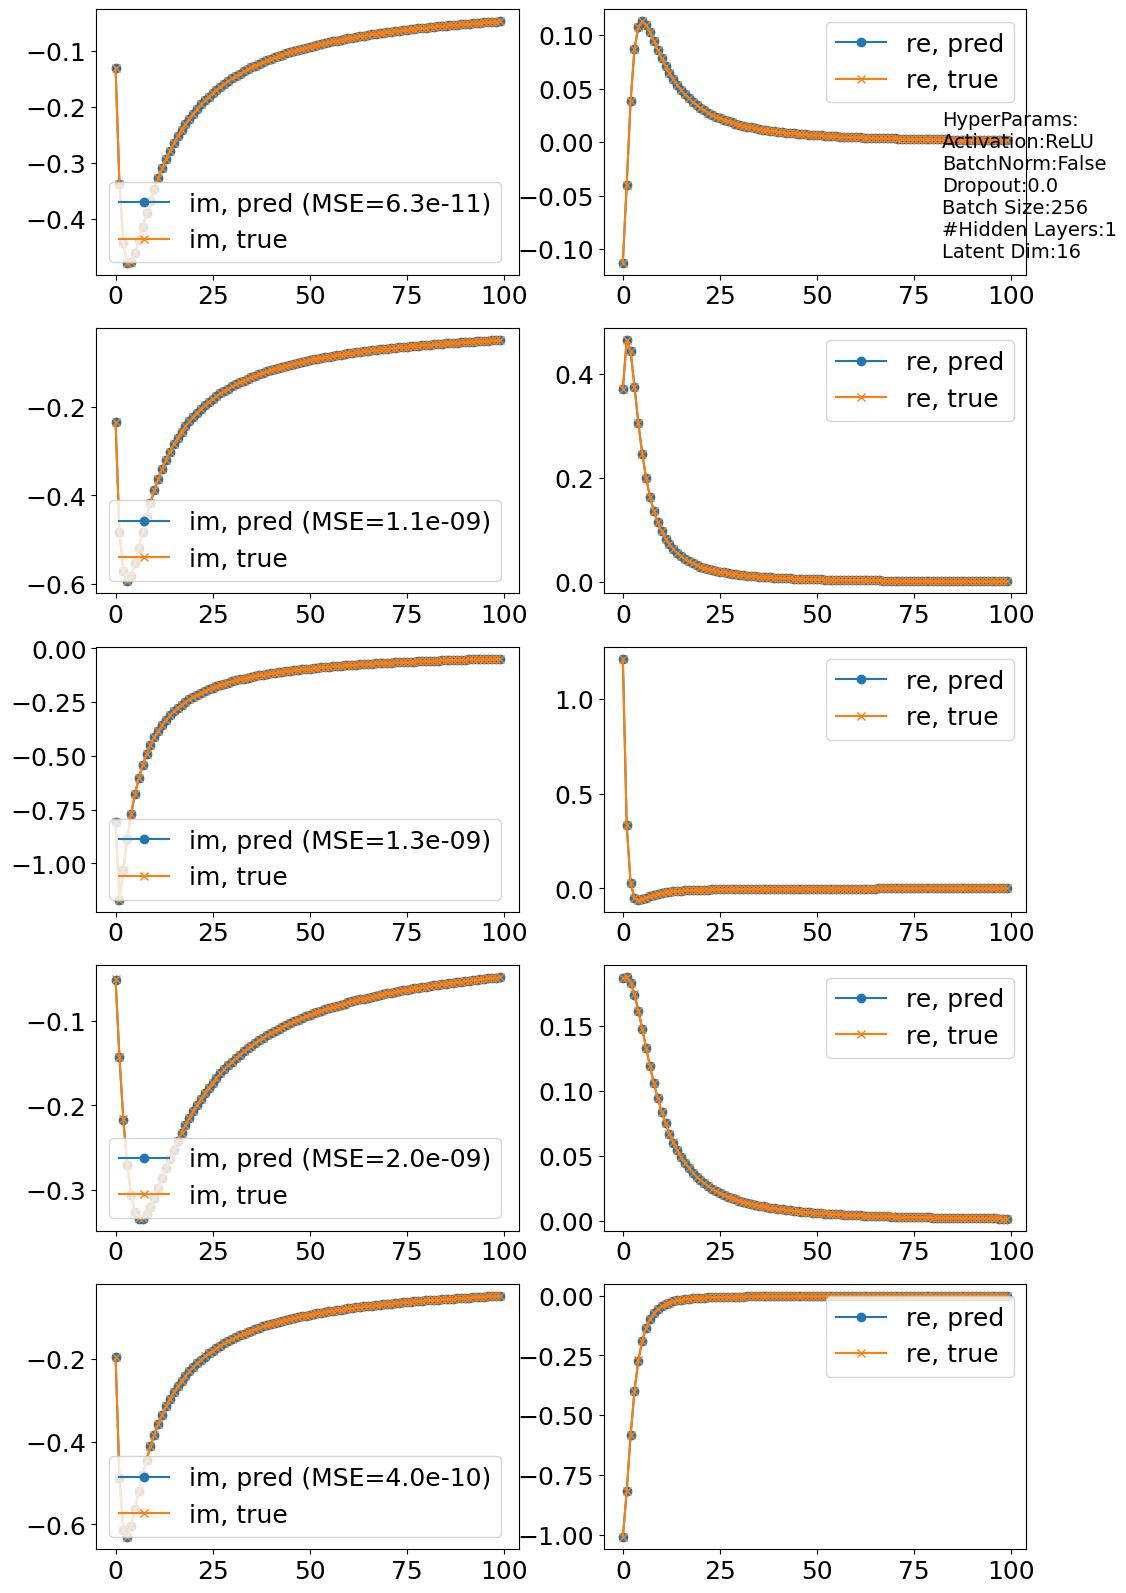

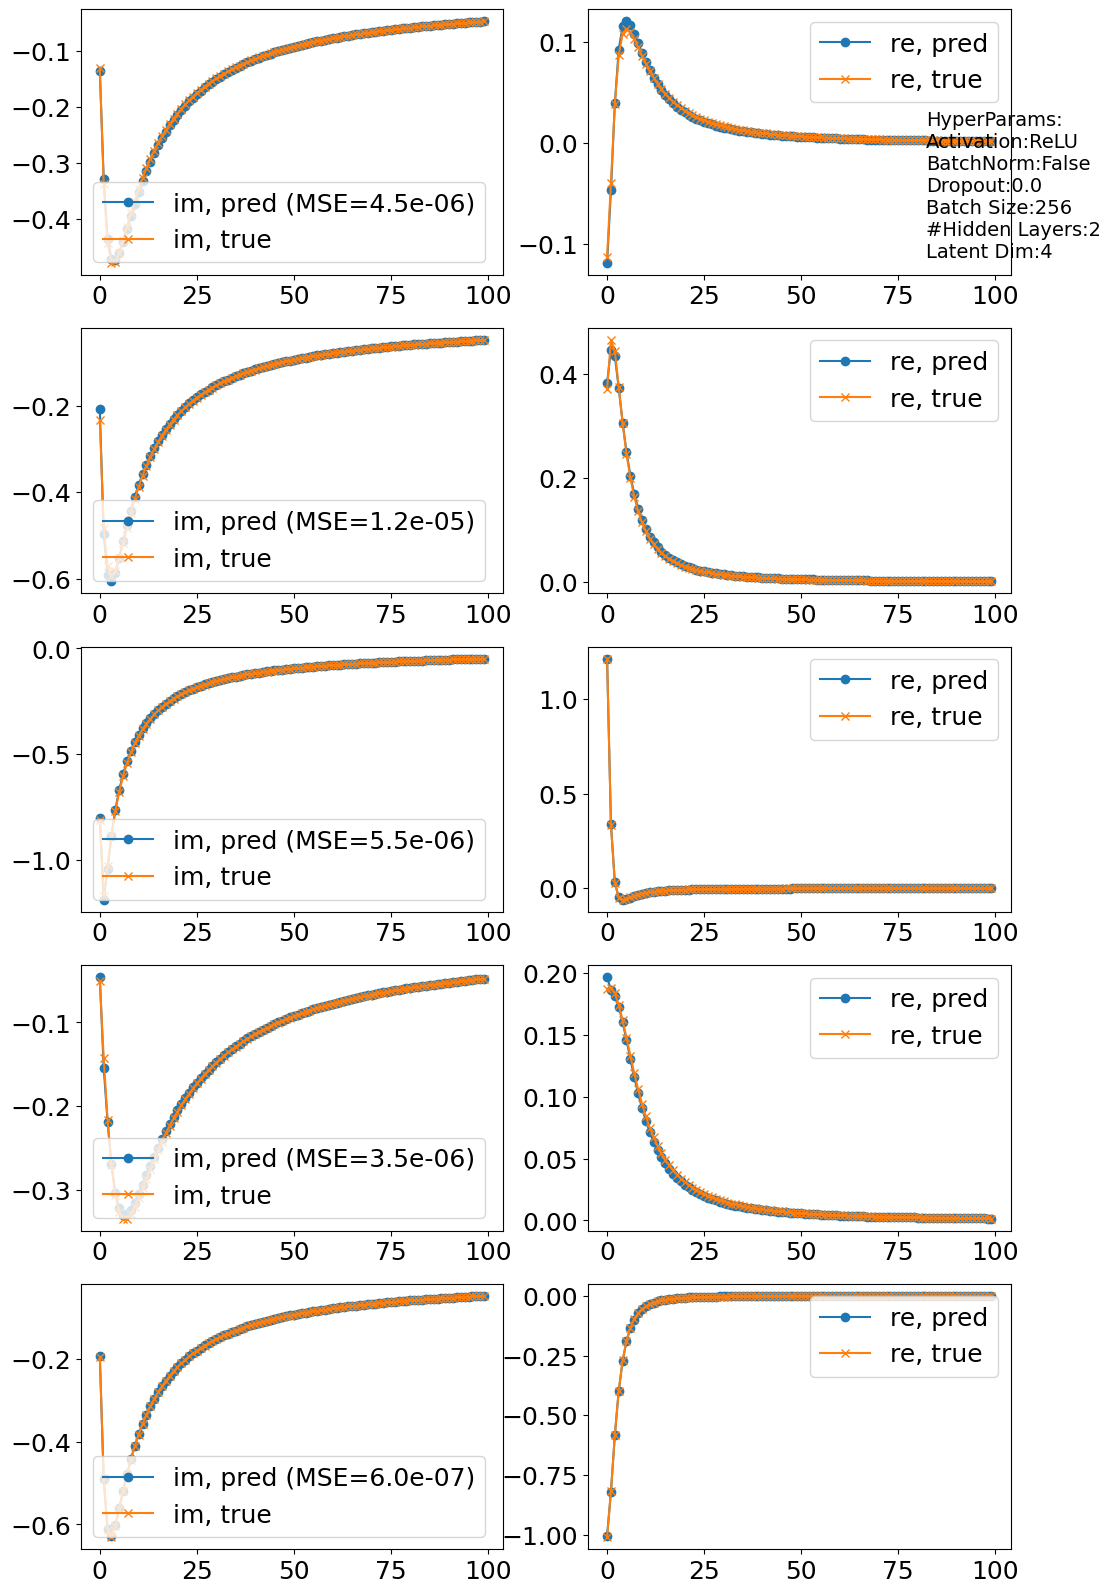

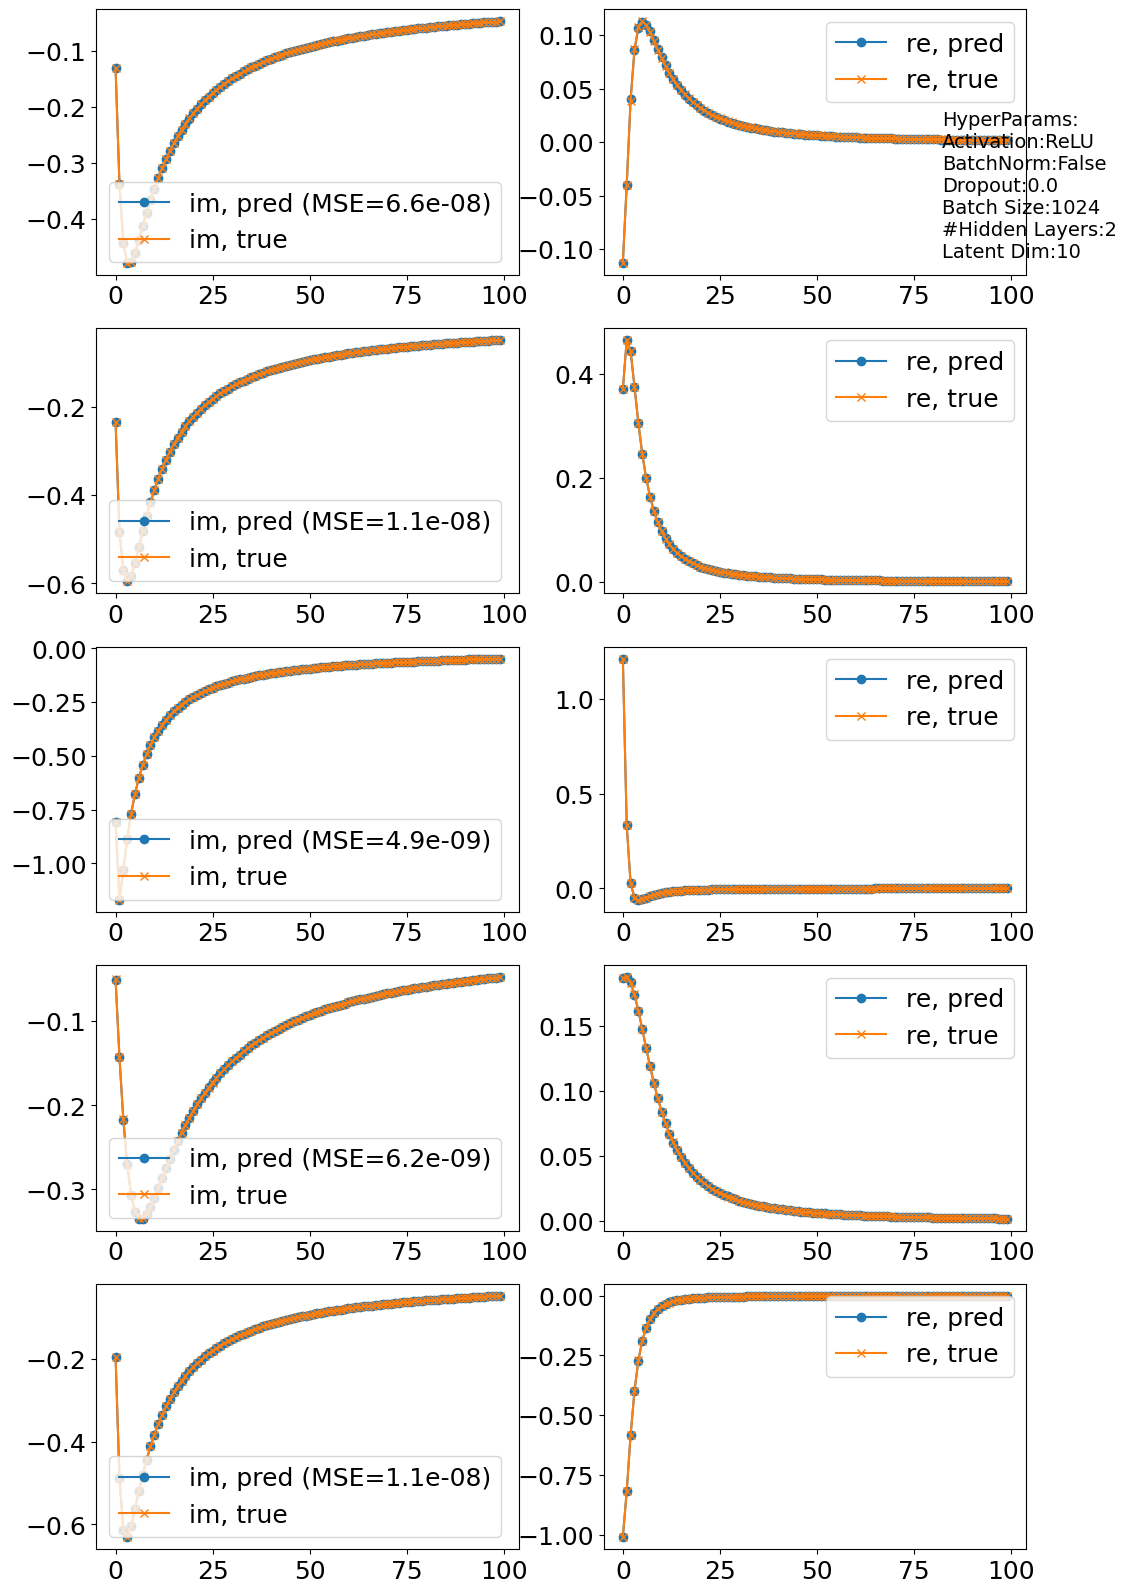

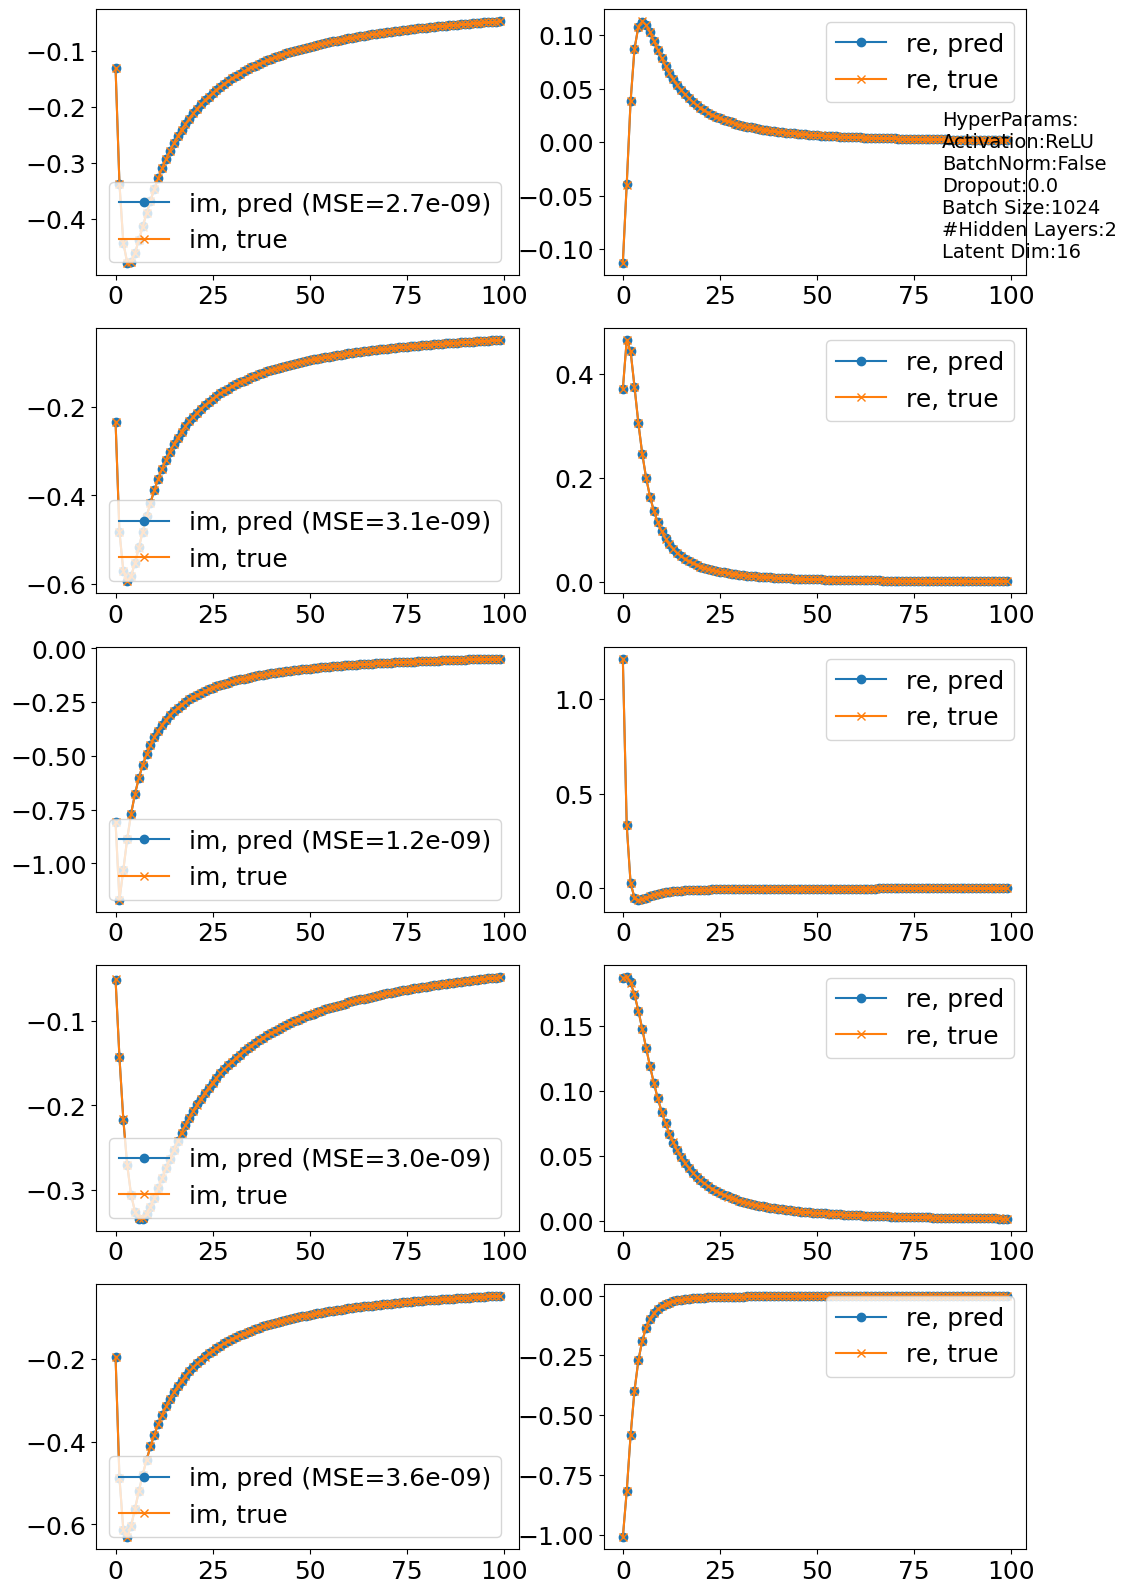

In [46]:
for pl_i in [1 + 42,4 + 42,7 + 42,15 + 42,18,21]:
    model = AutoEncoder_01.load_from_checkpoint("lightning_logs/AE_nPrune_02_nLayers_LatentScaling/version_{}/checkpoints/last.ckpt".format(pl_i))
    model.setup()
    device = "cpu"
    model.to(device)
    model.eval()
    ind_list = [-1, -2, -3, -1510,-1511]

    fig,ax = plt.subplots(len(ind_list),2, figsize=(12,4*len(ind_list)))
    for i,ind in enumerate(ind_list):
        x_test, y_test = model.val_dataset[ind]
        x_test = x_test.to(device).reshape(1,-1)
        y_pred = model(x_test)
        loss = model.loss(y_pred, x_test)
        y_pred = y_pred.detach().numpy()
        #
        if i == 0:
            text = "HyperParams:\nActivation:{}\nBatchNorm:{}\nDropout:{}\nBatch Size:{}\n#Hidden Layers:{}\nLatent Dim:{}".format(model.hparams["activation"],model.hparams["with_batchnorm"],model.hparams["dropout"], model.hparams["batch_size"], model.hparams["n_layers"], model.hparams["latent_dim"])
            ax[i,1].text(0.80, 0.05, text, transform=ax[i,1].transAxes, fontsize=14,
            verticalalignment='bottom')
        ax[i,0].plot(y_pred[0,100:], marker="o", markersize=6, label=f"im, pred (MSE={loss:.1e})")
        ax[i,0].plot(y_test[100:], marker="x", label=f"im, true")
        ax[i,0].legend()

        ax[i,1].plot(y_pred[0,0:100], marker="o", markersize=6, label="re, pred")
        ax[i,1].plot(y_test[0:100], marker="x", label="re, true")
        ax[i,1].legend()
        
    #fig.suptitle('No Dropout, Weighted, Medium Model Size, Medium Training Size ', fontsize=20)
    plt.savefig("demo_AE_{}.pdf".format(pl_i))
    #plt.show()

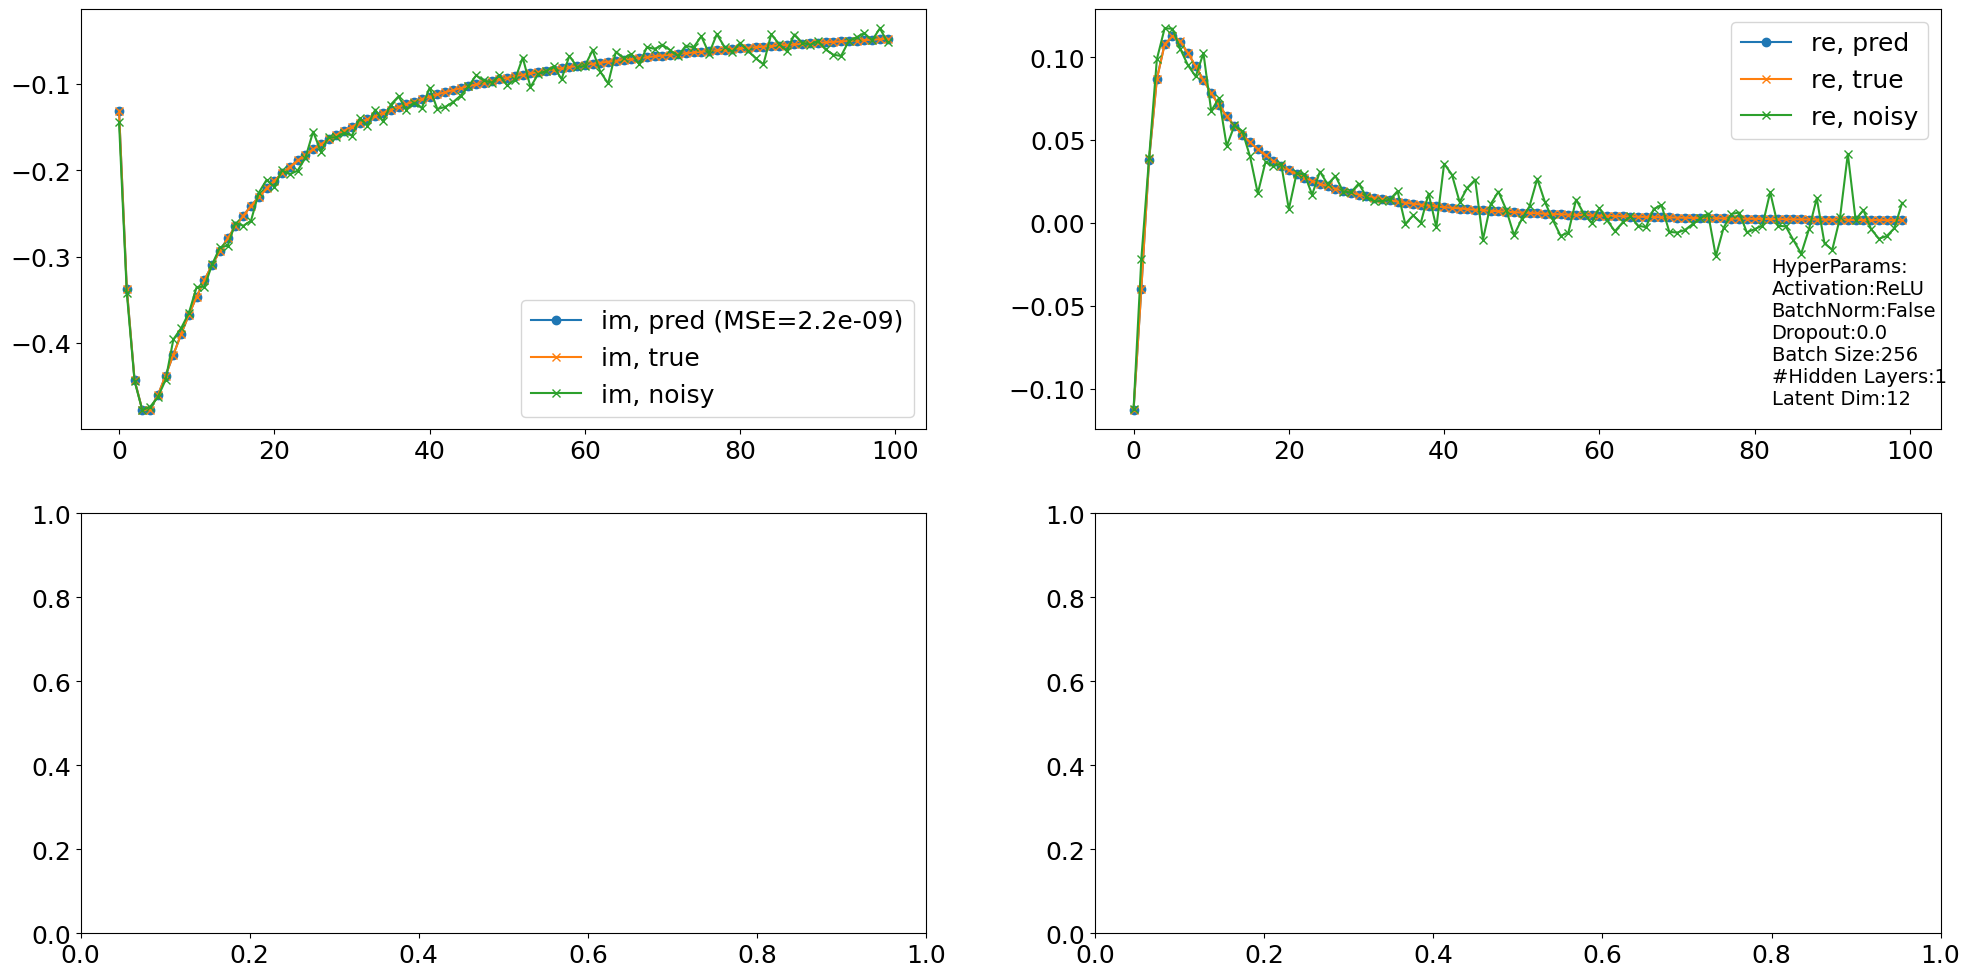

In [78]:
pl_i = 47
model = AutoEncoder_01.load_from_checkpoint("lightning_logs/AE_nPrune_02_nLayers_LatentScaling/version_{}/checkpoints/last.ckpt".format(pl_i))
model.setup()
device = "cpu"
model.to(device)
model.eval()
ind_list = [-1, -2, -3, -1510,-1511]

fig,ax = plt.subplots(2,2, figsize=(24,12))
i = 0
ind = -1
x_test, y_test = model.val_dataset[ind]

x_test = x_test.to(device).reshape(1,-1)[0]
noise = np.random.normal(0.0, 0.01, size=x_test.shape)
x_test_noisy = x_test + noise
y_pred_noisy = model(x_test_noisy)
y_pred = model(x_test)
loss_noisy = model.loss(y_pred_noisy, x_test)
loss = model.loss(y_pred, x_test)
y_pred = y_pred.detach().numpy()
y_pred_noisy = y_pred_noisy.detach().numpy()
#
if i == 0:
    text = "HyperParams:\nActivation:{}\nBatchNorm:{}\nDropout:{}\nBatch Size:{}\n#Hidden Layers:{}\nLatent Dim:{}".format(model.hparams["activation"],model.hparams["with_batchnorm"],model.hparams["dropout"], model.hparams["batch_size"], model.hparams["n_layers"], model.hparams["latent_dim"])
    ax[i,1].text(0.80, 0.05, text, transform=ax[i,1].transAxes, fontsize=14,
    verticalalignment='bottom')
ax[i,0].plot(y_pred[100:], marker="o", markersize=6, label=f"im, pred (MSE={loss:.1e})")
ax[i,0].plot(y_test[100:], marker="x", label=f"im, true")
ax[i,0].plot(x_test_noisy[100:], marker="x", label=f"im, noisy")
ax[i,0].legend()

ax[i,1].plot(y_pred[0:100], marker="o", markersize=6, label="re, pred")
ax[i,1].plot(y_test[0:100], marker="x", label="re, true")
ax[i,1].plot(x_test_noisy[0:100], marker="x", label=f"re, noisy")
ax[i,1].legend()


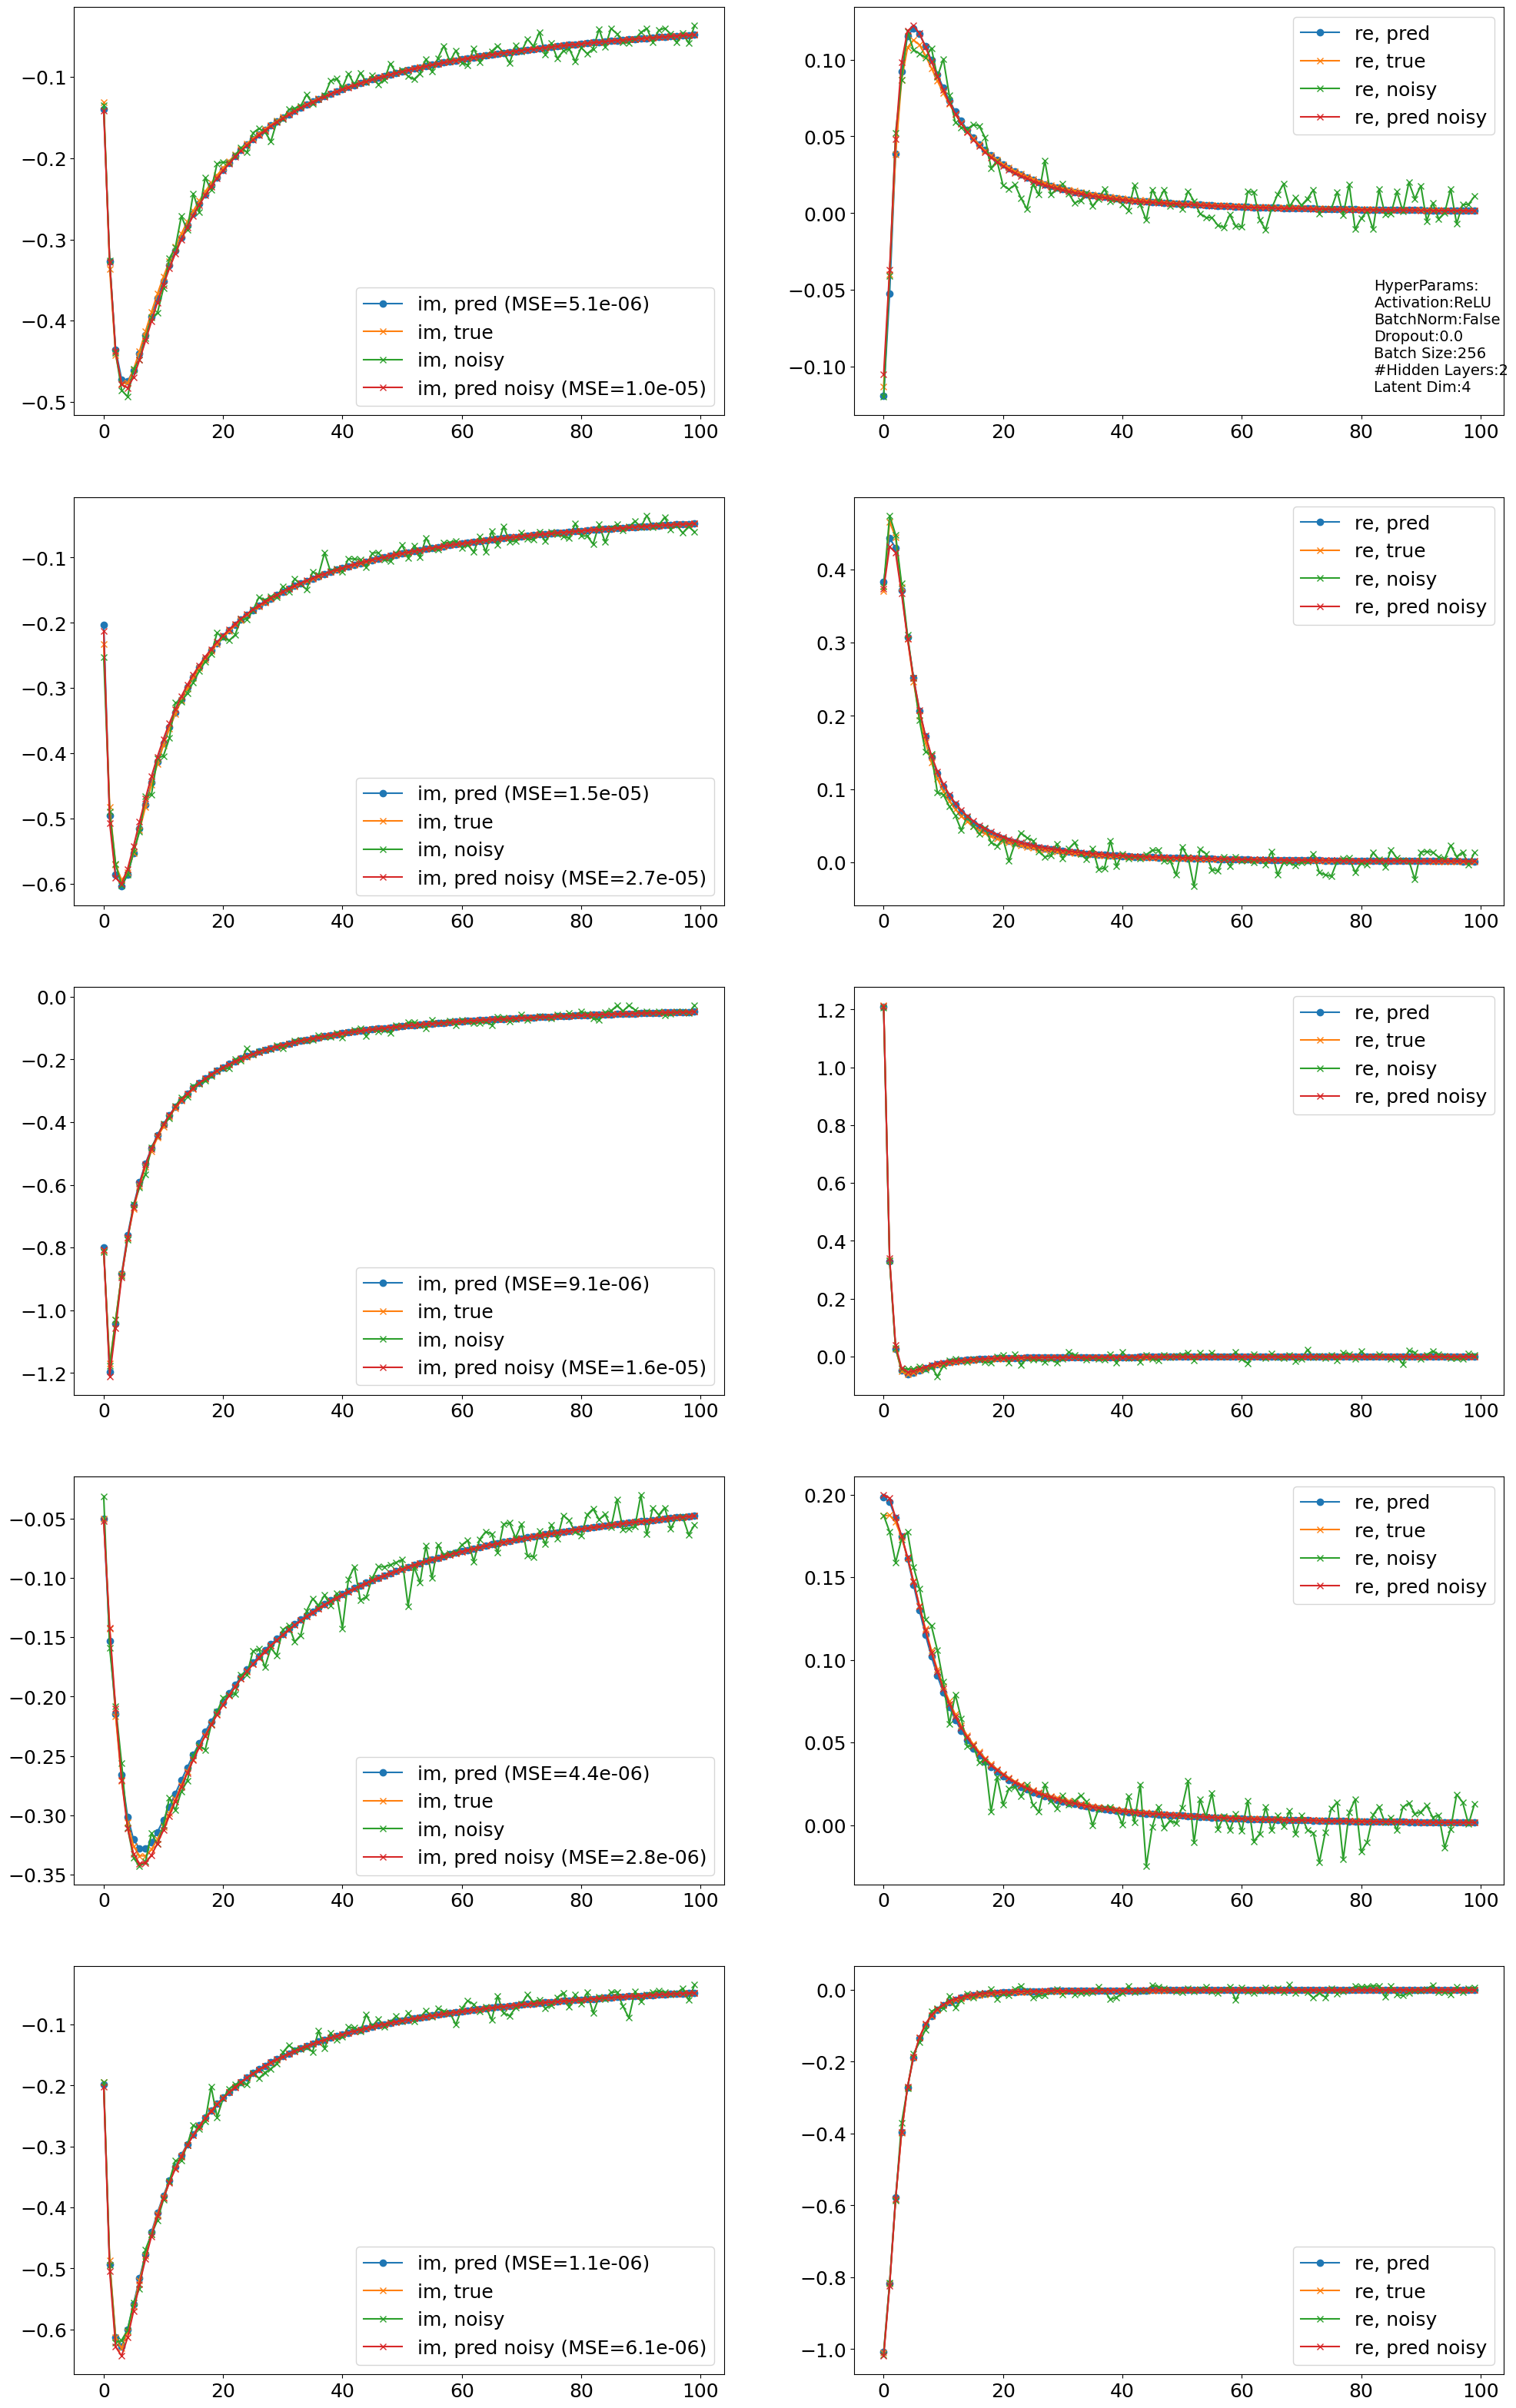

In [87]:
pl_i = 57
model = AutoEncoder_01.load_from_checkpoint("lightning_logs/AE_nPrune_02_nLayers_LatentScaling/version_{}/checkpoints/last.ckpt".format(pl_i))
model.setup()
device = "cpu"
model.to(device)
model.eval()
ind_list = [-1, -2, -3, -1510,-1511]

fig,ax = plt.subplots(len(ind_list),2, figsize=(24,8*len(ind_list)))
for i,ind in enumerate(ind_list):
    x_test, y_test = model.val_dataset[ind]
    
    x_test = x_test.to(device).reshape(1,-1)[0]
    noise = np.random.normal(0.0, 0.01, size=x_test.shape)
    x_test_noisy = x_test + noise
    y_pred_noisy = model(x_test_noisy)
    y_pred = model(x_test)
    loss_noisy = model.loss(y_pred_noisy, x_test)
    loss = model.loss(y_pred, x_test)
    y_pred = y_pred.detach().numpy()
    y_pred_noisy = y_pred_noisy.detach().numpy()
    #
    if i == 0:
        text = "HyperParams:\nActivation:{}\nBatchNorm:{}\nDropout:{}\nBatch Size:{}\n#Hidden Layers:{}\nLatent Dim:{}".format(model.hparams["activation"],model.hparams["with_batchnorm"],model.hparams["dropout"], model.hparams["batch_size"], model.hparams["n_layers"], model.hparams["latent_dim"])
        ax[i,1].text(0.80, 0.05, text, transform=ax[i,1].transAxes, fontsize=14,
        verticalalignment='bottom')
    ax[i,0].plot(y_pred[100:], marker="o", markersize=6, label=f"im, pred (MSE={loss:.1e})")
    ax[i,0].plot(y_test[100:], marker="x", label=f"im, true")
    ax[i,0].plot(x_test_noisy[100:], marker="x", label=f"im, noisy")
    ax[i,0].plot(y_pred_noisy[100:], marker="x", label=f"im, pred noisy (MSE={loss_noisy:.1e})")
    ax[i,0].legend()

    ax[i,1].plot(y_pred[0:100], marker="o", markersize=6, label="re, pred")
    ax[i,1].plot(y_test[0:100], marker="x", label="re, true")
    ax[i,1].plot(x_test_noisy[0:100], marker="x", label=f"re, noisy")
    ax[i,1].plot(y_pred_noisy[0:100], marker="x", label=f"re, pred noisy")
    ax[i,1].legend()

plt.savefig("denoise_demo.pdf")